In [3]:
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import math
np.random.seed(10)

# Generate and plot the random points
    - Points are in 1st and 8th octants with different labels.

In [1]:
# This function returns n uniformly random values between vmax & vmin.
def randrange(n, vmin, vmax):
    return (vmax - vmin)*np.random.rand(n) + vmin

# Create a 3D figure.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# n is number of points for each octant.
n = 20

# Put coordinates as 4-tuples into the points dict. 3 coordinate + 1 class label.
points = np.zeros((2*n,4))

# Coordinates of the points are between  plot_min and  plot_max for one octant.
# Coordinates of the points are between -plot_max and -plot_min for the other octant.
plot_min = 1
plot_max = 4
plot_len = plot_max

# Create RED point coordinates.
c, m, zlow, zhigh ='r', 'o', -plot_max, -plot_min
xs_r = randrange(n, zlow, zhigh)
ys_r = randrange(n, zlow, zhigh)
zs_r = randrange(n, zlow, zhigh)
ax.scatter(xs_r, ys_r, zs_r, c=c, marker=m)
# Put coordinates as triples into the points dict.
for i in range(n):
    points[i] = [xs_r[i],ys_r[i],zs_r[i],1]

# Create BLUE point coordinates.
c, m, zlow, zhigh ='b', '^', plot_min, plot_max
xs_b = randrange(n, zlow, zhigh)
ys_b = randrange(n, zlow, zhigh)
zs_b = randrange(n, zlow, zhigh)
ax.scatter(xs_b, ys_b, zs_b, c=c, marker=m)
# Put coordinates as triples into the points dict.
for i in range(n):
    points[i+n] = [xs_b[i],ys_b[i],zs_b[i],-1]

# Set labels to axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

# See one example point
print('One example point is:',points[0])
print('The last element of the point is the class.')

NameError: name 'plt' is not defined

## Sigmoid function

In [13]:
def sigmoid(x):
    # Condition to avoid the overflow.
    if x < 0:
        return 1 - 1 / (1 + math.exp(x))
    return 1 / (1 + math.exp(-x))

# This method calculates total cost given weights and points.
    - Sigmoid threshold can be changed, its default value is 0.5

In [14]:
def calculate_total_cost(weights,points, sigmoid_threshold=0.5):
    # Our classifications for each point will be in the y vector.
    y = np.zeros(len(points))
    # Cost = J = 1/2 * (d - y)^2
    total_cost = 0

    # For each point, determine the class wrt sigmoid of point_sum.
    # point_sum is the dot product of weights and point coordinates.
    for i in range(len(points)):
        point = points[i]
        point_sum = np.dot(point[:-1], weights)

        # If sigmoid is greater than a threshold, classify as 1 (RED), o/w -1 (BLUE)
        if sigmoid(point_sum)>sigmoid_threshold:
            y[i] = 1
        else:
            y[i] = -1

        # If our "determined class" is not equal to the "desired class", add 4 to the total cost.
        # Because ((1)-(-1))^2 or ((-1)-(1))^2, they are both 4
        if y[i]!=points[i][-1]:
            total_cost += 4
    return total_cost, y

# Initialize weights with random values

In [15]:
mu, sigma = 0, 5 # mean and standard deviation
# Create the weight matrix randomly
w = np.random.normal(mu, sigma, 3)

print('Initial weights are:',str(w))
total_cost, y = calculate_total_cost(w,points)
print('Initial cost is: ',total_cost)

Initial weights are: [-2.35700041  1.74738204  8.05728647]
Initial cost is:  160


# Assuming the problem is linearly seperable, iterate until the cost is zero.

In [16]:
# HYPERPARAMETER Learning coefficient alpha
alpha = 0.02
# Weights_new = Weights_old + learning_coef * (expected - predicted) * x
counter = 0
costs = [total_cost]
while total_cost > 0:
    counter += 1
    for i in range(len(points)):
        point = points[i]
        desired = point[-1]
        w = w + alpha*(desired - y[i])*point[:-1]
        total_cost, y = calculate_total_cost(w,points)
        if total_cost == 0:
            costs.append(total_cost)
            break
        costs.append(total_cost)

    #costs.append(total_cost)
print('Cost for each iteration:' , costs)

Cost for each iteration: [160, 160, 160, 160, 160, 160, 156, 156, 156, 156, 152, 152, 152, 144, 140, 136, 132, 116, 116, 116, 112, 112, 112, 108, 100, 96, 92, 92, 76, 76, 76, 76, 76, 68, 64, 64, 64, 56, 56, 56, 56, 56, 56, 52, 52, 44, 44, 44, 44, 44, 44, 44, 44, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 24, 24, 24, 24, 20, 20, 20, 20, 20, 20, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0]


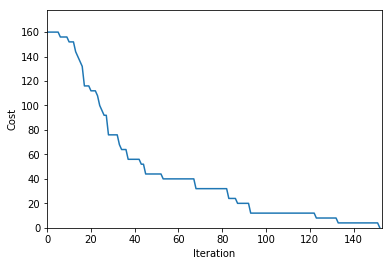

In [17]:
%matplotlib inline
plt.plot(range(len(costs)),costs)
plt.axis([0, len(costs), 0, costs[0]*10/9])
#plt.xticks(list(range(len(costs))))
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

# This method plots points and the plane
    - This method will be called for a few times for seeing the plot from different angles.

In [18]:
def plot_points_and_plane():
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    c, m, zlow, zhigh ='r', 'o', -plot_max, -plot_min
    ax.scatter(xs_r, ys_r, zs_r, c=c, marker=m)
    c, m, zlow, zhigh ='b', '^', plot_min, plot_max
    ax.scatter(xs_b, ys_b, zs_b, c=c, marker=m)
    
    Axes3D.plot_surface(ax,X,Y,Z,shade=True,color='gray')
    #shading flat 
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.grid(True)
    plt.show()

# Create the X, Y, Z points for the seperating plane & plot

<IPython.core.display.Javascript object>


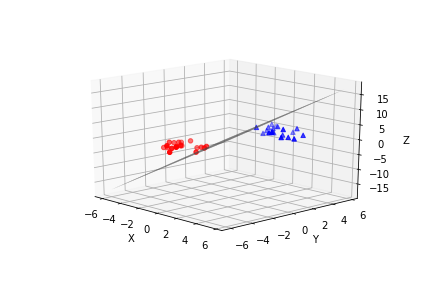

In [21]:
%matplotlib notebook

a = np.arange(-plot_max-2, plot_max+2, 0.3)
b = np.arange(-plot_max-2, plot_max+2, 0.3)
X, Y = np.meshgrid(a, b, sparse=True)

# Given X and Y, Z coordinate of the plane is calculated by this:
Z=(- w[0] * X - w[1] * Y)/w[2]
plot_points_and_plane()


## See the plot from different angle

<IPython.core.display.Javascript object>


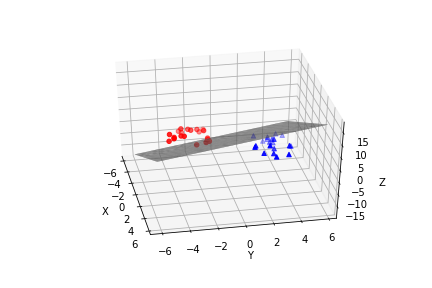

In [24]:
# To see from different angle.
plot_points_and_plane()

## See the plot from different angle

<IPython.core.display.Javascript object>


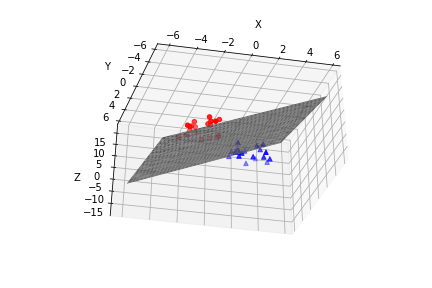

In [25]:
# To see from different angle.
plot_points_and_plane()

## See the plot from different angle

<IPython.core.display.Javascript object>


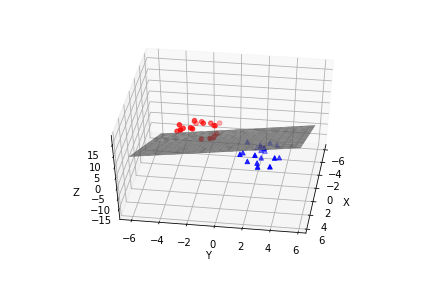

In [28]:
# To see from different angle.
plot_points_and_plane()

# Final Weights

In [30]:
w

array([-5.79110209, -2.11583203,  2.71425961])

# Conclusion & Evaluation
 - The above given examples are visualizations of a simple Perceptron Model. The analysis of the model can be tested with different hyperparameters such as 'the learning coefficient alpha' and different initial random states of weights. 
 - We can see that our model works well. The seperating plane converges until it makes the cost equal to zero. The plane, at the end, will be almost tangent to at least one point because once it seperate different classes, it does not try to be as far as all points. This might be considered as a drawback of the algorithm.